In [ ]:
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [ ]:
# import some data to play with
iris = datasets.load_iris()

iris_data = pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_data['target'] = iris['target']
iris_data.head()

In [2]:
# import aome data to play with
ir = datasets.load_iris()

data = pd.DataFrame(ir['data'], columns = ir['feature_names'])
data['target'] = ir['target']
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
#print(iris['target_names'])
print(ir['target_names'])

['setosa' 'versicolor' 'virginica']


In [4]:
data.shape

(150, 5)

In [5]:
data.iloc[:,0:4].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data['target'] = ir.target_names[data.target]
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
data.groupby('target').size()


target
setosa        50
versicolor    50
virginica     50
dtype: int64

In [10]:
data.target.value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61135ffe10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6113382ed0>]], dtype=object)

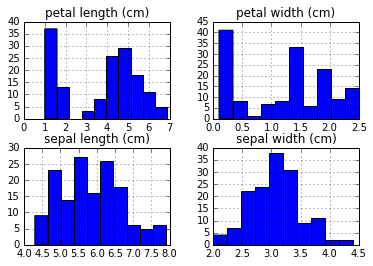

In [13]:
data.hist()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f611322bed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f610f1ec950>]], dtype=object)

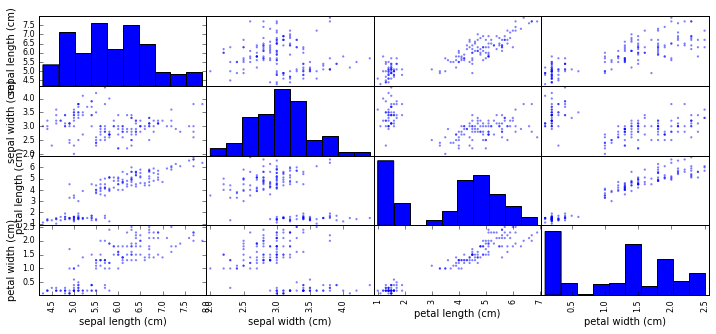

In [14]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data,figsize=(12,5))

ValueError: to_rgba: Invalid rgba arg "setosa"
to_rgb: Invalid rgb arg "setosa"
could not convert string to float: setosa

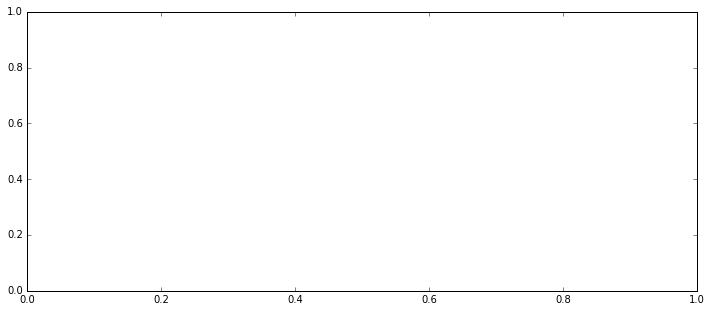

In [17]:
plt.figure(figsize=(12,5))
plt.scatter(data['sepal length (cm)'],data['sepal width (cm)'],c=data['target'],cmap=plt.cm.Paired)
plt.show()

In [18]:
X_reduced = PCA(n_components=3).fit_transform(ir.data)

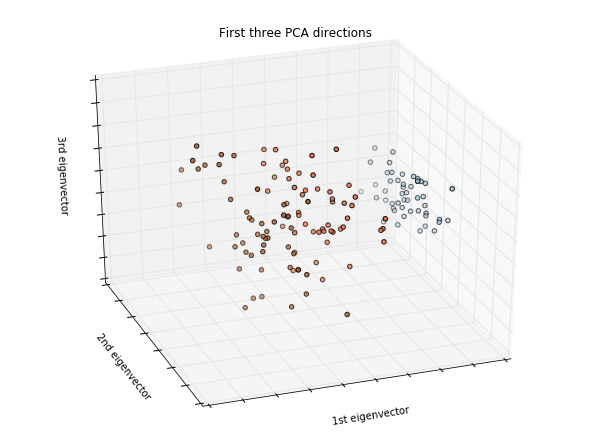

In [20]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=ir.target,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()


In [21]:
from sklearn.cross_validation import train_test_split

array = data.values
X = array[:,0:4]
Y = array[:,4]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=0.2, random_state=42)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class="multinomial", solver="newton-cg", n_jobs=-1)
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
model.predict_proba(X_validation)

array([[  3.77030268e-03,   8.26967796e-01,   1.69261902e-01],
       [  9.47162212e-01,   5.28375895e-02,   1.98577500e-07],
       [  8.51084476e-09,   1.55716435e-03,   9.98442827e-01],
       [  6.37896129e-03,   7.92134968e-01,   2.01486070e-01],
       [  1.43121685e-03,   7.74067212e-01,   2.24501571e-01],
       [  9.56307863e-01,   4.36919621e-02,   1.75023546e-07],
       [  7.74385394e-02,   9.08244970e-01,   1.43164911e-02],
       [  1.57835678e-04,   1.56049970e-01,   8.43792195e-01],
       [  2.20687019e-03,   7.62321299e-01,   2.35471831e-01],
       [  2.83296139e-02,   9.45738099e-01,   2.59322872e-02],
       [  4.30910598e-04,   2.43701629e-01,   7.55867461e-01],
       [  9.68983173e-01,   3.10167508e-02,   7.67036210e-08],
       [  9.73336959e-01,   2.66630082e-02,   3.29176501e-08],
       [  9.62842400e-01,   3.71574911e-02,   1.09141088e-07],
       [  9.79453099e-01,   2.05468367e-02,   6.42202177e-08],
       [  4.47349739e-03,   7.12918406e-01,   2.8260809

In [24]:
model.predict(X_validation)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [25]:
Y_validation

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_validation,model.predict(X_validation))

1.0